# ehs_analysis

## 1. Setup

In [1]:
import pandas as pd
import os

In [2]:
ehs_dir=r'C:\Users\cvskf\OneDrive - Loughborough University\_Data\English_Housing_Survey_2016_Housing_Stock_Data\UKDA-8350-tab\tab'

## 2. Read data

In [74]:
df=pd.read_csv(
    os.path.join(ehs_dir,'general15plus16_eul.tab'),
    sep='\t'
)
df

,serialanon,aagpd1516,aagph1516,tenure8x,tenure4x,tenure2x,vacantx,gorEHS,region3x,govreg1
0,15160010001,1151,1151,1,1,1,1,4,1,1
1,15160010005,967,982,2,2,1,1,7,3,4
2,15160010007,925,943,2,2,1,1,5,3,2
3,15160010010,449,455,4,4,2,1,5,3,2
4,15160010011,1368,1495,2,2,1,1,6,3,2
...,...,...,...,...,...,...,...,...,...,...
12287,16170038015,4321,4336,1,1,1,1,7,3,4
12288,16170038016,4679,4703,2,2,1,1,1,1,1
12289,16170038017,11174,11178,1,1,1,1,2,1,1
12290,16170038019,1283,1328,4,4,2,1,8,2,3


In [52]:
sum(df.aagpd1516)

23732635

## 3. First look at the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12292 entries, 0 to 12291
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   serialanon  12292 non-null  int64 
 1   aagpd1516   12292 non-null  int64 
 2   aagph1516   12292 non-null  object
 3   tenure8x    12292 non-null  int64 
 4   tenure4x    12292 non-null  int64 
 5   tenure2x    12292 non-null  int64 
 6   vacantx     12292 non-null  int64 
 7   gorEHS      12292 non-null  int64 
 8   region3x    12292 non-null  int64 
 9   govreg1     12292 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 960.4+ KB


In [5]:
df.columns

Index(['serialanon', 'aagpd1516', 'aagph1516', 'tenure8x', 'tenure4x',
       'tenure2x', 'vacantx', 'gorEHS', 'region3x', 'govreg1'],
      dtype='object')

## 4. Data processing

### 4.1 Select columns of interest

In [6]:
df1=df[['serialanon','tenure8x']]
df1

,serialanon,tenure8x
0,15160010001,1
1,15160010005,2
2,15160010007,2
3,15160010010,4
4,15160010011,2
...,...,...
12287,16170038015,1
12288,16170038016,2
12289,16170038017,1
12290,16170038019,4


### 4.2. Change column name

In [7]:
new_heading_dict={'tenure8x':'Tenure with vacancy'}

df1=df1.rename(columns=new_heading_dict)
df1

,serialanon,Tenure with vacancy
0,15160010001,1
1,15160010005,2
2,15160010007,2
3,15160010010,4
4,15160010011,2
...,...,...
12287,16170038015,1
12288,16170038016,2
12289,16170038017,1
12290,16170038019,4


### 4.3 Update values

In [8]:
new_values_dict={
    1.0:'owner occupied - occupied',
    2.0:'private rented - occupied',
    3.0:'local authority - occupied',
    4.0:'housing association - occupied',
    5.0:'owner occupied - vacant',
    6.0:'private rented - vacant',
    7.0:'local authority - vacant',
    8.0:'housing association - vacant',
    -9.0:'Does not apply',
    -8.0:'No answer'
}

In [11]:
df1['Tenure with vacancy']=df1['Tenure with vacancy'].map(new_values_dict)
df1

,serialanon,Tenure with vacancy
0,15160010001,owner occupied - occupied
1,15160010005,private rented - occupied
2,15160010007,private rented - occupied
3,15160010010,housing association - occupied
4,15160010011,private rented - occupied
...,...,...
12287,16170038015,owner occupied - occupied
12288,16170038016,private rented - occupied
12289,16170038017,owner occupied - occupied
12290,16170038019,housing association - occupied


## 5. Data analysis

In [22]:
counts=df1['Tenure with vacancy'].value_counts()
counts

owner occupied - occupied         5050
housing association - occupied    2609
private rented - occupied         2411
local authority - occupied        1854
private rented - vacant            141
owner occupied - vacant             90
housing association - vacant        84
local authority - vacant            53
Name: Tenure with vacancy, dtype: int64

In [35]:
x=counts.tolist()
type(x)

list

In [36]:
x

[5050, 2609, 2411, 1854, 141, 90, 84, 53]

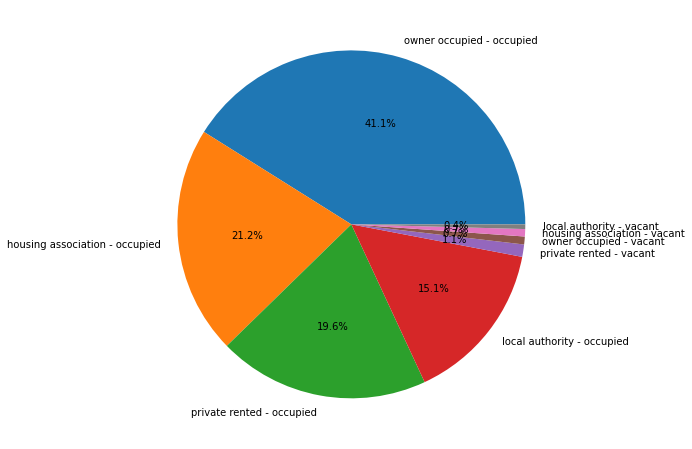

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(
    x, 
    labels=counts.index,
    autopct='%1.1f%%'
)

plt.show()

In [38]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

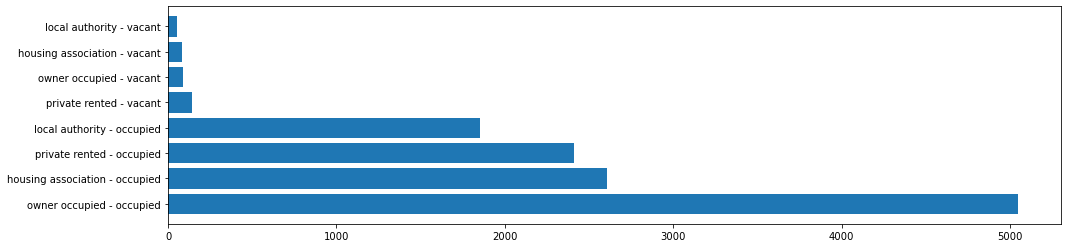

In [44]:
fig, ax = plt.subplots(figsize=(16,4))

x=counts.index
y=counts.values

ax.barh(
    x,
    y,
)

plt.show()

## extra - creating json

In [45]:
new_values_dict={
    1.0:'owner occupied - occupied',
    2.0:'private rented - occupied',
    3.0:'local authority - occupied',
    4.0:'housing association - occupied',
    5.0:'owner occupied - vacant',
    6.0:'private rented - vacant',
    7.0:'local authority - vacant',
    8.0:'housing association - vacant',
    -9.0:'Does not apply',
    -8.0:'No answer'
}

In [50]:
var1={
    'pos': 1,
    'variable' :'serialanon',
    'label': 'Key variable: unique archived identifier',
    'type': 'numeric',
    'SPSS measurement level': 'SCALE'
}
var1

{'pos': 1,
 'variable': 'serialanon',
 'label': 'Key variable: unique archived identifier',
 'type': 'numeric',
 'SPSS measurement level': 'SCALE'}

In [53]:
var2={
    'pos': 2,
    'variable' :'aagpd1516',
    'label': 'Rounded dwelling weight for 2 year Physical Survey sample',
    'type': 'numeric',
    'SPSS measurement level': 'SCALE'
}
var2

{'pos': 2,
 'variable': 'aagpd1516',
 'label': 'Rounded dwelling weight for 2 year Physical Survey sample',
 'type': 'numeric',
 'SPSS measurement level': 'SCALE'}

In [56]:
var4={
    'pos': 4,
    'variable' :'tenure8x',
    'label': 'Tenure with vacancy',
    'type': 'numeric',
    'SPSS measurement level': 'NOMINAL',
    'codes': {
        1.0:'owner occupied - occupied',
        2.0:'private rented - occupied',
        3.0:'local authority - occupied',
        4.0:'housing association - occupied',
        5.0:'owner occupied - vacant',
        6.0:'private rented - vacant',
        7.0:'local authority - vacant',
        8.0:'housing association - vacant',
        -9.0:'Does not apply',
        -8.0:'No answer'
    }
}
var4

{'pos': 4,
 'variable': 'tenure8x',
 'label': 'Tenure with vacancy',
 'type': 'numeric',
 'SPSS measurement level': 'NOMINAL',
 'codes': {1.0: 'owner occupied - occupied',
  2.0: 'private rented - occupied',
  3.0: 'local authority - occupied',
  4.0: 'housing association - occupied',
  5.0: 'owner occupied - vacant',
  6.0: 'private rented - vacant',
  7.0: 'local authority - vacant',
  8.0: 'housing association - vacant',
  -9.0: 'Does not apply',
  -8.0: 'No answer'}}

In [57]:
data=[var1,var2,var4]
data

[{'pos': 1,
  'variable': 'serialanon',
  'label': 'Key variable: unique archived identifier',
  'type': 'numeric',
  'SPSS measurement level': 'SCALE'},
 {'pos': 2,
  'variable': 'aagpd1516',
  'label': 'Rounded dwelling weight for 2 year Physical Survey sample',
  'type': 'numeric',
  'SPSS measurement level': 'SCALE'},
 {'pos': 4,
  'variable': 'tenure8x',
  'label': 'Tenure with vacancy',
  'type': 'numeric',
  'SPSS measurement level': 'NOMINAL',
  'codes': {1.0: 'owner occupied - occupied',
   2.0: 'private rented - occupied',
   3.0: 'local authority - occupied',
   4.0: 'housing association - occupied',
   5.0: 'owner occupied - vacant',
   6.0: 'private rented - vacant',
   7.0: 'local authority - vacant',
   8.0: 'housing association - vacant',
   -9.0: 'Does not apply',
   -8.0: 'No answer'}}]

In [58]:
import json
with open('general15plus16_eul_ukda_data_dictionary.json','w') as f:
    json.dump(data,f, indent=4)


## 3. Data processing

In [70]:
df

,serialanon,aagpd1516,aagph1516,tenure8x,tenure4x,tenure2x,vacantx,gorEHS,region3x,govreg1
0,15160010001,1151,1151,1,1,1,1,4,1,1
1,15160010005,967,982,2,2,1,1,7,3,4
2,15160010007,925,943,2,2,1,1,5,3,2
3,15160010010,449,455,4,4,2,1,5,3,2
4,15160010011,1368,1495,2,2,1,1,6,3,2
...,...,...,...,...,...,...,...,...,...,...
12287,16170038015,4321,4336,1,1,1,1,7,3,4
12288,16170038016,4679,4703,2,2,1,1,1,1,1
12289,16170038017,11174,11178,1,1,1,1,2,1,1
12290,16170038019,1283,1328,4,4,2,1,8,2,3


In [71]:
with open('general15plus16_eul_ukda_data_dictionary.json') as f:
    metadata=json.load(f)
metadata

[{'pos': 1,
  'variable': 'serialanon',
  'label': 'Key variable: unique archived identifier',
  'type': 'numeric',
  'SPSS measurement level': 'SCALE'},
 {'pos': 2,
  'variable': 'aagpd1516',
  'label': 'Rounded dwelling weight for 2 year Physical Survey sample',
  'type': 'numeric',
  'SPSS measurement level': 'SCALE'},
 {'pos': 4,
  'variable': 'tenure8x',
  'label': 'Tenure with vacancy',
  'type': 'numeric',
  'SPSS measurement level': 'NOMINAL',
  'codes': {'1.0': 'owner occupied - occupied',
   '2.0': 'private rented - occupied',
   '3.0': 'local authority - occupied',
   '4.0': 'housing association - occupied',
   '5.0': 'owner occupied - vacant',
   '6.0': 'private rented - vacant',
   '7.0': 'local authority - vacant',
   '8.0': 'housing association - vacant',
   '-9.0': 'Does not apply',
   '-8.0': 'No answer'}}]

In [80]:
df2=df.copy()
for col in df.columns:
    
    print(col)
    
    # find variable dictionary
    try:
        var_dict=[x for x in metadata if x['variable']==col][0]
    except IndexError:
        continue  # skip if not present in metadata
        
    # updating column name 
    label=var_dict['label']
    df2=df2.rename(columns={col:label})
    
    # update codes
    if 'codes' in var_dict:
        
        codes=var_dict['codes']
        
        codes={float(k):v for k,v in codes.items()}
        
        df2[label]=df2[label].map(codes)
        
    
df2

serialanon
aagpd1516
aagph1516
tenure8x
tenure4x
tenure2x
vacantx
gorEHS
region3x
govreg1


,Key variable: unique archived identifier,Rounded dwelling weight for 2 year Physical Survey sample,aagph1516,Tenure with vacancy,tenure4x,tenure2x,vacantx,gorEHS,region3x,govreg1
0,15160010001,1151,1151,owner occupied - occupied,1,1,1,4,1,1
1,15160010005,967,982,private rented - occupied,2,1,1,7,3,4
2,15160010007,925,943,private rented - occupied,2,1,1,5,3,2
3,15160010010,449,455,housing association - occupied,4,2,1,5,3,2
4,15160010011,1368,1495,private rented - occupied,2,1,1,6,3,2
...,...,...,...,...,...,...,...,...,...,...
12287,16170038015,4321,4336,owner occupied - occupied,1,1,1,7,3,4
12288,16170038016,4679,4703,private rented - occupied,2,1,1,1,1,1
12289,16170038017,11174,11178,owner occupied - occupied,1,1,1,2,1,1
12290,16170038019,1283,1328,housing association - occupied,4,2,1,8,2,3


In [81]:
df2.to_csv('processed_data.csv')

In [63]:
df1=df[['serialanon','tenure8x']]
df1

,serialanon,tenure8x
0,15160010001,1
1,15160010005,2
2,15160010007,2
3,15160010010,4
4,15160010011,2
...,...,...
12287,16170038015,1
12288,16170038016,2
12289,16170038017,1
12290,16170038019,4


In [64]:
metadata

[{'pos': 1,
  'variable': 'serialanon',
  'label': 'Key variable: unique archived identifier',
  'type': 'numeric',
  'SPSS measurement level': 'SCALE'},
 {'pos': 2,
  'variable': 'aagpd1516',
  'label': 'Rounded dwelling weight for 2 year Physical Survey sample',
  'type': 'numeric',
  'SPSS measurement level': 'SCALE'},
 {'pos': 4,
  'variable': 'tenure8x',
  'label': 'Tenure with vacancy',
  'type': 'numeric',
  'SPSS measurement level': 'NOMINAL',
  'codes': {'1.0': 'owner occupied - occupied',
   '2.0': 'private rented - occupied',
   '3.0': 'local authority - occupied',
   '4.0': 'housing association - occupied',
   '5.0': 'owner occupied - vacant',
   '6.0': 'private rented - vacant',
   '7.0': 'local authority - vacant',
   '8.0': 'housing association - vacant',
   '-9.0': 'Does not apply',
   '-8.0': 'No answer'}}]

In [65]:
for x in metadata:
    if x['variable']=='tenure8x':
        break
x

{'pos': 4,
 'variable': 'tenure8x',
 'label': 'Tenure with vacancy',
 'type': 'numeric',
 'SPSS measurement level': 'NOMINAL',
 'codes': {'1.0': 'owner occupied - occupied',
  '2.0': 'private rented - occupied',
  '3.0': 'local authority - occupied',
  '4.0': 'housing association - occupied',
  '5.0': 'owner occupied - vacant',
  '6.0': 'private rented - vacant',
  '7.0': 'local authority - vacant',
  '8.0': 'housing association - vacant',
  '-9.0': 'Does not apply',
  '-8.0': 'No answer'}}

In [69]:
[x for x in metadata if x['variable']=='tenure8x'][0]['label']

'Tenure with vacancy'